In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.0 MB/s 


In [2]:
import pickle
import numpy as np
import os
import mne
import pandas as pd
pickle.format_version

'4.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
main_path = '/content/drive/MyDrive/Test_eeg'
all_file = os.listdir(main_path)

file_name = list()
for file in all_file:
    if file[0:3] == 'exp':
      file_name.append(file)
file_name = sorted(file_name)
file = file_name[8:] + file_name[0:8]
print(file)

['exp1_Ati.csv', 'exp2_Tonson.csv', 'exp3_Pyae.csv', 'exp4_Duc.csv', 'exp5_And.csv', 'exp6_Sayaka.csv', 'exp7_Suyoga.csv', 'exp8_Arti.csv', 'exp9_Amanda.csv', 'exp10_Sapna.csv', 'exp11_Data.csv', 'exp12_Jirasak.csv', 'exp13_Max.csv', 'exp14_Ayush.csv', 'exp15_Dipesh.csv', 'exp16_Shashank.csv', 'exp17_Mi.csv']


In [5]:
df = pd.read_csv(main_path + '/' + file[0])
df = df.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'])
df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
df

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,-3203.250850,-7278.934989,-22030.236963,-9343.319755,-3711.417760,2255.693347,-12633.653001,3538.079982,-22537.129824,-5153.306443,-16958.246166,-12598.918390,-25105.434669,-17961.593623,-23601.229322,-12943.850511
1,-3201.261544,-7280.209038,-22023.464384,-9339.251738,-3717.095103,2254.843981,-12623.482957,3549.121743,-22528.434995,-5154.111106,-16954.200501,-12597.577285,-25057.289011,-17954.262251,-23595.775496,-12940.073066
2,-3196.210050,-7273.592922,-22024.492565,-9336.636583,-3709.696676,2258.263798,-12628.355638,3541.052764,-22536.682789,-5150.914806,-16955.631012,-12597.934913,-25113.861276,-17958.620841,-23597.206008,-12945.079857
3,-3200.680399,-7275.045785,-22027.152422,-9340.548139,-3711.887146,2257.839114,-12625.986353,3540.337508,-22531.653646,-5155.362803,-16966.918643,-12605.355693,-25079.171369,-17968.075629,-23611.891104,-12950.332516
4,-3200.434530,-7280.454907,-22023.263219,-9337.888281,-3719.866719,2250.083059,-12625.360504,3544.740801,-22535.162870,-5155.876894,-16955.586309,-12599.141908,-25085.094581,-17956.765647,-23594.814371,-12943.895214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-1023.687544,-4436.709516,-24608.175410,-7672.683319,-870.712205,3996.514260,-11068.561503,2068.966874,-19891.152667,-2561.196990,-15042.232280,-10727.473882,-23593.182694,-15365.058525,-21944.339209,-10726.311591
44996,-1016.534986,-4433.557920,-24602.051032,-7667.207142,-870.868667,3997.363627,-11064.828761,2070.620903,-19898.282873,-2560.526438,-15037.672524,-10726.758626,-23615.623846,-15353.480322,-21941.701703,-10729.016153
44997,-1015.238585,-4427.813521,-24602.676881,-7664.524932,-859.826906,4002.616287,-11067.220398,2069.458612,-19891.867923,-2558.313615,-15045.048600,-10730.424312,-23618.797793,-15361.482246,-21954.531605,-10730.089036
44998,-1018.189015,-4432.820312,-24600.844038,-7668.280026,-871.963903,4003.420949,-11061.364241,2073.280760,-19889.163362,-2559.073574,-15034.945611,-10725.953964,-23582.744429,-15350.127560,-21938.706570,-10721.908298


In [6]:
# Drop some columns and save it into the new file.

for i in range(len(file)):
    converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file[i]
    df = pd.read_csv(main_path + '/' + file[i])
    df = df.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31'])
    df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    df = df.set_index(df.columns[0])
    df.to_csv(converted_signal_path)

In [28]:
def df_to_raw(df, convert=False):
    ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    ch_types = ['eeg'] * len(ch_names)
    df = df.T

    df[:] *= 1e-6 # mne assume volt data

    sampling_rate = 125 #Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
    raw = mne.io.RawArray(df, info)
    raw.set_montage('standard_1020')
    # plotting, is not work
    # raw.compute_psd().plot()
    return raw

In [8]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw)
    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [9]:
# Get the name of converted data

main_path = '/content/drive/MyDrive/Test_eeg'
all_file = os.listdir(main_path + '/Converted_signal')
conv_list = all_file[8:] + all_file[0:8]
conv_list

['Conv_exp9_Amanda.csv',
 'Conv_exp10_Sapna.csv',
 'Conv_exp11_Data.csv',
 'Conv_exp12_Jirasak.csv',
 'Conv_exp13_Max.csv',
 'Conv_exp15_Dipesh.csv',
 'Conv_exp14_Ayush.csv',
 'Conv_exp16_Shashank.csv',
 'Conv_exp17_Mi.csv',
 'Conv_exp1_Ati.csv',
 'Conv_exp2_Tonson.csv',
 'Conv_exp3_Pyae.csv',
 'Conv_exp4_Duc.csv',
 'Conv_exp5_And.csv',
 'Conv_exp6_Sayaka.csv',
 'Conv_exp7_Suyoga.csv',
 'Conv_exp8_Arti.csv']

In [10]:
file_path = main_path + '/Converted_signal/'
all_data = []
for file in conv_list:
    path = file_path + file
    df = pd.read_csv(path)
    all_data.append(df)

In [11]:
X = np.array(all_data)
X = np.transpose(X, (0, 2, 1))

In [12]:
X.shape

(17, 16, 45000)

In [36]:
label = pd.read_csv(main_path + '/label.csv')
y = np.array(label['label'])

In [37]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [38]:
y.shape

(17,)

In [15]:
# Our data is imbalance
np.unique(y, return_counts=True)

(array([0, 1]), array([10,  7]))

In [16]:
import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader, Dataset       #dataloader for preparing batch


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.autograd import Variable

In [39]:
# Create dataset
tensor_X = torch.tensor(X)
tensor_y = torch.tensor(y)
dataset = TensorDataset(tensor_X, tensor_y)

In [18]:
tensor_X.shape

torch.Size([17, 16, 45000])

In [19]:
for x, y in dataset:
    print(x.shape, y)
    break

torch.Size([16, 45000]) tensor(1)


In [22]:
# Meta data
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
ch_types = ['eeg'] * len(ch_names)
sfreq = 125
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# Create epochs
epochs = mne.EpochsArray(tensor_X, info)

# Set headset mapping
epochs.set_montage('standard_1020')
print('------------------')
# print(f'{epochs._data.shape = }')
print('------------------')
epochs

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
------------------
------------------


Number of events,17
Events,1: 17
Time range,0.000 – 359.992 sec
Baseline,off


In [23]:
# Compute power spectrum density

epoch = epochs.__getitem__(0)
spectrum = epoch.compute_psd(method="welch", n_fft=125) #get Spectrum object from epochs
psds, freqs = spectrum.get_data(return_freqs=True)
print(psds.shape, freqs.shape)

Effective window size : 1.000 (s)
(1, 16, 63) (63,)


In [24]:
epochs.get_data().shape

(17, 16, 45000)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


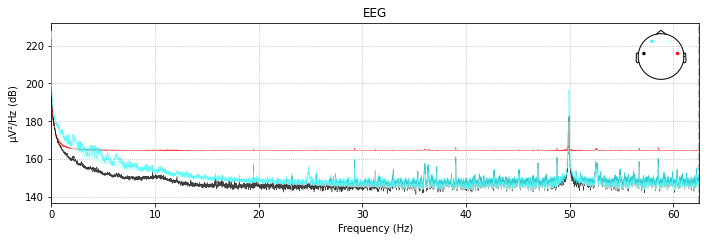

In [25]:
epochs.compute_psd().plot(picks=['F3','F4','T3','T4'])

In [29]:
raw_eeg = dict()

for index, file in enumerate(file_name):
    converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file
    df = pd.read_csv(converted_signal_path)
    raw = df_to_raw(df, convert=False)
    raw_eeg['exp' + str(index)] = raw
    print(f'{file} | time: {len(df)/125}')

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp10_Sapna.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp11_Data.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp12_Jirasak.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp13_Max.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp14_Ayush.csv | time: 360.0
Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
exp15_Dipesh.csv | time: 360.0
Creating RawArray with float64 data, n_channel

In [30]:
# Get freqeuency
def get_freq(info):
    raw = info
    power, freq = mne.time_frequency.psd_welch(raw,n_fft=125, verbose=True)
    return freq
    
for name, info in raw_eeg.items():
    freq = get_freq(info)
    print(freq)
    break

<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


Effective window size : 1.000 (s)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62.]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [31]:
band_names = np.array(['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Slow', 'Low_beta'])
filter_list = [[1,3],[4,7],[8,12],[13,30],[30,43], [4,13], [13,17]]
# band_names = np.array(['Delta', 'Theta', 'Alpha', 'Slow', 'Low_beta'])
# filter_list = [[1,3],[4,7],[8,12], [4,13], [13,17]]
bands = []
for filt in filter_list:
    pt = np.argwhere((freq >= filt[0]) & (freq <= filt[1])).reshape(-1)
    bands.append(pt)
bands = np.array(bands)
print(bands)

[array([1, 2, 3]) array([4, 5, 6, 7]) array([ 8,  9, 10, 11, 12])
 array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30])
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
 array([13, 14, 15, 16, 17])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [32]:
features = None
for name, info in raw_eeg.items():
    raw = info
    feature = None
    slow, gamma = None, None
    a_f3, a_f4 = None, None
    a_t7, a_t8 = None, None
    b_f3, b_f4 = None, None
    b_t7, b_t8 = None, None
    epochs = mne.Epochs(raw, np.array([[125*60*1, 0, 1]]), tmin=0, tmax=30, baseline=(0,30), verbose=False)
    for index, band in enumerate(bands):
        power,freq = mne.time_frequency.psd_welch(epochs,n_fft=125, verbose=False)
        power = power.squeeze()
        power = 10 * np.log10(power)
        data = power[::,band].mean(axis=1).reshape(1,-1)
        # for asym
        if(band_names[index] == 'Alpha'):
            a_f3 = data[:,raw.ch_names.index('F3')]
            a_f4 = data[:,raw.ch_names.index('F4')]
            # We use t3 as t7 and t4 as t8
            a_t7 = data[:,raw.ch_names.index('T3')]
            a_t8 = data[:,raw.ch_names.index('T4')]
        if(band_names[index] == 'Beta'):
            b_f3 = data[:,raw.ch_names.index('F3')]
            b_f4 = data[:,raw.ch_names.index('F4')]
            # We use t3 as t7 and t4 as t8
            b_t7 = data[:,raw.ch_names.index('T3')]
            b_t8 = data[:,raw.ch_names.index('T4')]

        ####### Mean for visualization #######
        data = data.mean().reshape(1,-1)
        # for relative gamma
        if(band_names[index] == 'Slow'): 
            slow = data
        if(band_names[index] == 'Gamma'): 
            gamma = data

        if(type(feature) == type(None)): 
            feature = data
        else: 
            feature = np.concatenate([feature, data], axis=1)

    # print(feature.shape)
    # the eighth feature: relative gamma is slow/gamma
    relative_gamma = slow/gamma
    feature = np.concatenate([feature, relative_gamma], axis=1)
    # The asymetry
    alpha_frontal = ((a_f4 - a_f3) / (a_f4 + a_f3)).reshape(1,-1)
    feature = np.concatenate([feature, alpha_frontal], axis=1)
    # alpha_temporal
    alpha_temporal = ((a_t8 - a_t7) / (a_t8 + a_t7)).reshape(1,-1)
    feature = np.concatenate([feature, alpha_temporal], axis=1)
    # alpha_asymmetry
    alpha_asymmetry = alpha_frontal + alpha_temporal
    feature = np.concatenate([feature, alpha_asymmetry], axis=1)
    # beta_frontal
    beta_frontal = ((b_f4 - b_f3) / (b_f4 + b_f3)).reshape(1,-1)
    feature = np.concatenate([feature, beta_frontal], axis=1)
    # beta_temporal
    beta_temporal = ((b_t8 - b_t7) / (b_t8 + b_t7)).reshape(1,-1)
    feature = np.concatenate([feature, beta_temporal], axis=1)

    # print(slow/gamma)
    # print(feature.shape)
    # print(feature)
    # info['all'] = feature
    #print(feature.shape)
    if(type(features) == type(None)): features = feature
    else: features = np.concatenate([features, feature], axis=0)
    
print(features.shape)

<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, follow

(17, 13)


<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 
import torch
import pandas as pd

In [34]:
df = pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-94.996576,-110.903207,-114.773895,-121.122393,-124.979970,-113.248582,-117.899964,0.906134,-0.001514,-0.011088,-0.012602,-0.001776,-0.001404
1,-106.788552,-113.942070,-109.585851,-120.832516,-123.079296,-112.249467,-119.891229,0.912009,-0.002586,0.003181,0.000595,-0.005903,-0.000275
2,-108.026517,-110.699927,-107.719570,-103.952412,-100.748248,-108.932981,-106.326615,1.081239,0.016989,-0.001622,0.015367,0.025435,-0.003944
3,-106.156311,-114.295895,-115.433873,-124.426951,-130.816510,-115.385202,-121.523719,0.882039,0.004222,0.016922,0.021145,0.003022,0.025987
4,-106.417041,-114.516242,-115.118548,-120.241424,-129.090598,-114.949269,-116.521627,0.890454,0.003168,0.000900,0.004067,0.005338,0.002117
5,-109.504827,-119.055543,-115.031059,-124.084616,-130.702928,-116.698444,-121.199190,0.892853,0.007887,0.007038,0.014925,0.002388,-0.006147
6,-106.178285,-113.702218,-109.964916,-124.019152,-131.635218,-112.446304,-121.331171,0.854227,0.002641,0.000562,0.003203,0.004647,0.002997
7,-104.494165,-110.791449,-111.006553,-113.542544,-115.590628,-110.974574,-112.813626,0.960066,-0.004481,-0.003223,-0.007704,-0.001873,-0.000938
8,-112.343023,-120.335399,-123.538806,-129.674002,-133.446199,-122.613497,-128.077431,0.918823,-0.000057,-0.001260,-0.001317,-0.001753,0.000231
9,-108.215845,-117.189340,-118.060173,-121.186449,-121.748715,-117.919905,-120.830154,0.968552,0.007224,-0.000919,0.006305,-0.005205,0.000474


In [40]:
features.shape,y.shape

((17, 13), (17,))

In [41]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=16)

In [44]:
model = RandomForestClassifier(n_estimators=2, max_features=13, n_jobs=4, max_depth=2, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred.min(), y_pred.max()
cross = cross_val_score(model, X_train, y_train, cv=5)
print('Model Accuracy : ', accuracy_score(y_test,y_pred))
print('Cross Validation Accuracy :',cross.mean())

Model Accuracy :  0.6
Cross Validation Accuracy : 0.7


                precision    recall  f1-score   support

without Stress       0.67      0.67      0.67         3
   with Stress       0.50      0.50      0.50         2

      accuracy                           0.60         5
     macro avg       0.58      0.58      0.58         5
  weighted avg       0.60      0.60      0.60         5

AxesHostAxes(0.898056,0.665873;0.075x0.214286)


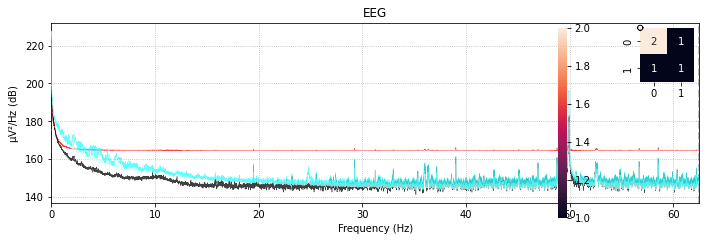

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
target_names = ['without Stress', 'with Stress']
print(classification_report(y_test, y_pred, target_names=target_names))
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
plt.show()